# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown block to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [4]:
df = pd.read_excel('car_prices.xlsx')
df = pd.read_excel('car_prices.xlsx').dropna()
y = df['Price (DKK)']
X_ = df.drop(['Price (DKK)', 'Rear-Wheel Drive'], axis = 1).astype('float64')
X = pd.concat([X_], axis = 1)

np.random.seed(42)

X.head()

,Model Year,Mileage (km),Electric Range (km),Battery Capacity (kWh),Energy Consumption (Wh/km),Annual Road Tax (DKK),Horsepower (bhp),0-100 km/h (s),Top Speed (km/h),Towing Capacity (kg),Original Price (DKK),Number of Doors,All-Wheel Drive (AWD),Front-Wheel Drive
0,2024.0,3000.0,270.0,39.0,168.0,780.0,147.0,7.9,144.0,1000.0,250720.0,5.0,0.0,1.0
1,2024.0,1001.0,536.0,82.0,177.0,780.0,408.0,4.9,180.0,1800.0,462900.0,5.0,1.0,0.0
2,2024.0,4000.0,460.0,64.8,162.0,780.0,204.0,7.8,167.0,750.0,345620.0,5.0,0.0,1.0
3,2024.0,10.0,550.0,76.6,153.0,780.0,286.0,6.7,180.0,1000.0,395615.0,5.0,0.0,0.0
4,2024.0,0.0,505.0,99.8,228.0,780.0,384.0,5.3,200.0,2500.0,745520.0,5.0,1.0,0.0


In [5]:
X_scaled = X.copy()
scaler = StandardScaler().fit(X)
columns_to_scale = list(X)
columns_to_scale.remove('All-Wheel Drive (AWD)')
columns_to_scale.remove('Front-Wheel Drive')
X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])
X_scaled.insert(0, 'ones', 1)

scaler_y = StandardScaler()
y_scaled = y.copy()
# y_scaled = scaler_y.fit_transform(y_scaled)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=1)

## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.


### Task 1: Regression



Linear regression finds the best-fitting line (or hyperplane) by solving for the **coefficient vector** $\mathbf{B}$ that minimizes the squared error:

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where:
- $\mathbf{X}$ is the **design matrix**, including a column of ones for the intercept.
- $\mathbf{y}$ is the **response variable** (target values).
- $\mathbf{B}$ contains the **regression coefficients**.

**Explanation of Each Step**
1. **Construct the matrix $X$**:
   - Each **row** represents a data point.
   - Each **column** represents a feature.
   - The **first column is all ones** to account for the **intercept**.

2. **Solve for $\mathbf{B}$ using the normal equation**:
   - Compute $X^T X$ (feature correlation).
   - Compute $X^T y$ (cross-product with the target variable).
   - Compute the **inverse of $X^T X$** and multiply by $X^T y$ to get $\mathbf{B}$.

3. **Interpret the results**:
   - The **first value** in $\mathbf{B}$ is the **intercept**.
   - The remaining values are the **coefficients for each feature**.



In [9]:
# step 1
X_design = X_train.copy()

# step 2
X_t = X_design.T

X_t_X = X_t @ X_design
X_t_y = X_t @ y_train

X_t_X_inv = np.linalg.inv(X_t_X)

B = X_t_X_inv @ X_t_y

In [10]:
B

array([ 0.05128945,  0.17211418, -0.10464041,  0.00849086,  0.11586013,
       -0.02924359, -0.05499432,  0.01201507,  0.0635881 ,  0.01290548,
        0.04802191,  0.83560452,  0.00688764, -0.08435038, -0.07249172])

Task 2: Evaluating the Model

Once we have the regression coefficients $\mathbf{B}$, we can evaluate how well the model fits the data using two key metrics:

1. **Mean Squared Error (MSE)** – Measures the average squared difference between the predicted and actual values:
   $$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Lower MSE means better fit.

2. **$R^2$ (Coefficient of Determination)** – Measures how much of the variance in $y$ is explained by $X$:
   $$
   R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
   $$
   - $R^2$ ranges from **0 to 1**, where **1** indicates a perfect fit and **0** means the model explains no variance.


**Explanation of Each Step**
1. **Compute Predictions**:  
   $$ \hat{y} = X B $$
   This gives the model’s predicted values.

2. **Compute MSE**:  
   - We square the residuals $ (y - \hat{y})^2 $ and take the mean.

3. **Compute $R^2$**:
   - **Total sum of squares** $ SS_{total} $ measures the total variance in $ y $.
   - **Residual sum of squares** $ SS_{residual} $ measures the variance left unexplained by the model.
   - $ R^2 $ tells us what fraction of variance is explained.

**Interpreting the Results**
- **MSE**: Lower values indicate a better fit.
- **$R^2$ Score**:
  - **$R^2 = 1$** → Perfect fit (all points on the regression line).
  - **$R^2 = 0$** → Model is no better than predicting the mean of $ y $.
  - **$R^2 < 0$** → Model performs worse than a simple average.

Implement the above steps using linear algebra so that you both create a regression model and calculate the MSE and $R^2$. Note, here you need to use `X_train`, `X_test`, `y_train` and `y_test` appropriately!


In [13]:
# needed to calculate r squared of train data
y_predicted_train = np.dot(X_train, B)

residuals_train = (y_train - y_predicted_train) ** 2
mean_train = y_train.mean()

mse_train = 1/len(y) * residuals_train.mean()
sse = np.sum((y_train - y_predicted_train)**2)
sst_train = np.sum((y_train - mean_train)**2)
ssr_train = np.sum((y_predicted_train - mean_train)**2)

In [14]:
# needed to calculate r squared of test data
y_predicted_test = np.dot(X_test, B)

residuals_test = (y_test - y_predicted_test) ** 2
mean_test = y_test.mean()

mse_test = 1/len(y) * residuals_test.mean()
sse = np.sum((y_test - y_predicted_test)**2)
sst_test = np.sum((y_test - mean_test)**2)
ssr_test = np.sum((y_predicted_test - mean_test)**2)

In [15]:
r_squared_train = ssr_train/sst_train
r_squared_test = ssr_test/sst_test

print(r_squared_train)
print(r_squared_test)

0.8938816937225348
0.8802043072778352


# Part 2: Using Library Functions

### Task 4: Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


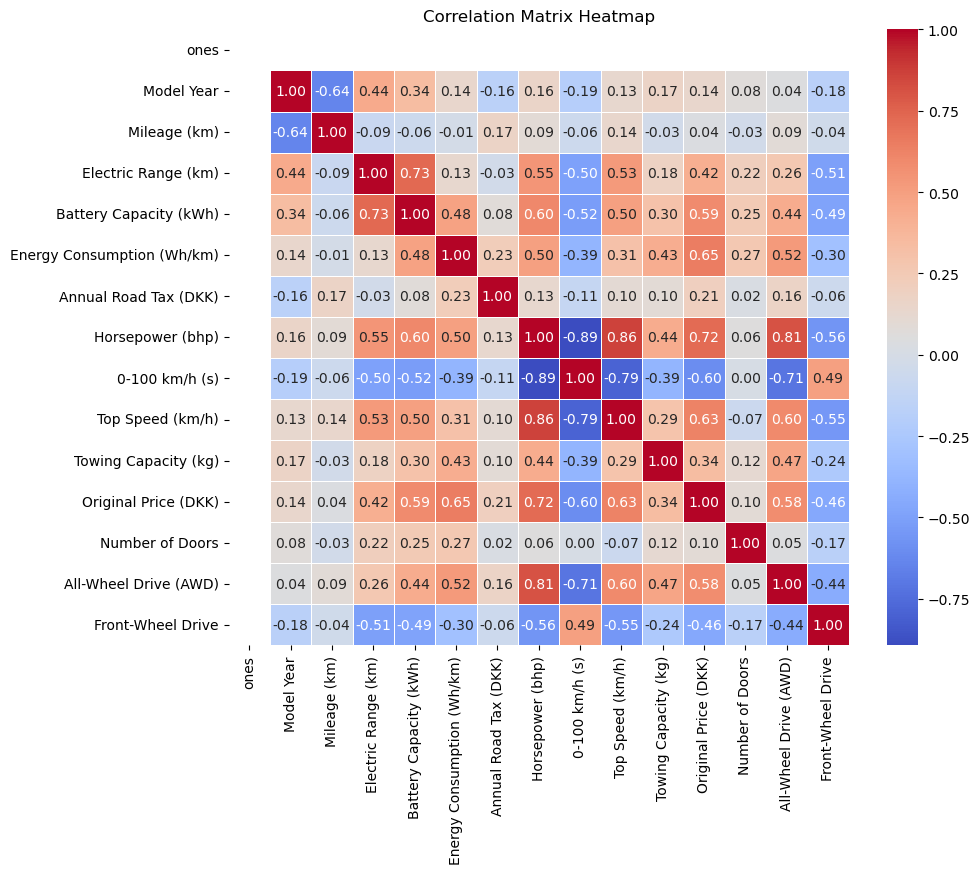

In [18]:
# step 1
corr_matrix = X_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Considering close correlation of the '0-100 km/h (s)' and 'Top Speed (km/h)' features with 'Horsepower (bhp)', it should be safe to assume that the two previous ones are directly related to the later one, and that they can be removed without greatly affecting the model.

In [20]:
ols = LinearRegression()
ols.fit(X_train, y_train)

print("r^2 on train data is {}".format(ols.score(X_train, y_train)))
print("r^2 on test data is {}".format(ols.score(X_test, y_test)))

r^2 on train data is 0.8938816937225404
r^2 on test data is 0.88681225096803


In [21]:
mse = mean_squared_error(y_test, ols.predict(X_test))
rmse = math.sqrt(mse)
rmse

0.33599829713898943

### Task 5: Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For the final task you must do the following
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

In [24]:
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [25]:
# multiple alpha values
alphas = 10**np.linspace(10, -2, 100) * 0.5

# initializing to track the best models
best_ridge = None
best_lasso = None
best_elasticnet = None

best_ridge_alpha, best_lasso_alpha, best_elasticnet_alpha = None, None, None
best_ridge_mse, best_lasso_mse, best_elasticnet_mse = float("inf"), float("inf"), float("inf")

# storing MSE
ridge_mse_values = []
lasso_mse_values = []
elasticnet_mse_values = []


### Ridge Regression

In [27]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    ridge.fit(X_train_scaled, y_train_scaled)
    y_pred_ridge = ridge.predict(X_test_scaled)
    mse_ridge = mean_squared_error(y_test_scaled, y_pred_ridge)
    
    if mse_ridge < best_ridge_mse:
        best_ridge_mse = mse_ridge
        best_ridge_alpha = alpha
        best_ridge = ridge 

print(f"Best ridge alpha: {best_ridge_alpha}")

Best ridge alpha: 0.005


### Lasso Regression

In [29]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(X_train_scaled, y_train_scaled)
    y_pred_lasso = lasso.predict(X_test_scaled)
    mse_lasso = mean_squared_error(y_test_scaled, y_pred_lasso)
    
    if mse_lasso < best_lasso_mse:
        best_lasso_mse = mse_lasso
        best_lasso_alpha = alpha
        best_lasso = lasso 

print(f"Best lasso alpha: {best_lasso_alpha}")

Best lasso alpha: 0.005


### Elastic Net Regression

In [31]:
for alpha in alphas:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=100000)
    elastic_net.fit(X_train_scaled, y_train_scaled)
    y_pred_en = elastic_net.predict(X_test_scaled)
    mse_en = mean_squared_error(y_test_scaled, y_pred_en)
    
    elasticnet_mse_values.append((alpha, mse_en))
    
   # print(f"Alpha: {alpha:.6f}, MSE: {mse_en:.6f}, R²: {r2_score(y_test_scaled, y_pred_en):.6f}")
    
    if mse_en < best_elasticnet_mse:
        best_elasticnet_mse = mse_en
        best_elasticnet_alpha = alpha

print(f"Best elastic net alpha: {best_elasticnet_alpha}")

Best elastic net alpha: 0.008737642000038414


### Best alphas based on the lowest MSE

In [33]:
print(f"Best ridge alpha: {best_ridge_alpha}, MSE: {best_ridge_mse}")
print(f"Best lasso alpha: {best_lasso_alpha}, MSE: {best_lasso_mse}")
print(f"Best elastic net alpha: {best_elasticnet_alpha}, MSE: {best_elasticnet_mse}")

Best ridge alpha: 0.005, MSE: 0.11295661214526329
Best lasso alpha: 0.005, MSE: 0.10461414066339508
Best elastic net alpha: 0.008737642000038414, MSE: 0.10659233196266328


### Discuss the MSE and of all 3 models and conclude which model has the best performance

Since Lasso Regression has the lowest MSE, it is the best-performing model among the three. Lasso also has the added advantage of feature selection by shrinking some coefficients to zero, so the model is more interpretable and reduces overfitting.

### OLS

In [37]:
ols = LinearRegression()
ols.fit(X_train, y_train)

print("r^2 on train data is {}".format(ols.score(X_train, y_train)))
print("r^2 on test data is {}".format(ols.score(X_test, y_test)))

r^2 on train data is 0.8938816937225404
r^2 on test data is 0.88681225096803


### Interpretation of the OLS model’s coefficients

In [39]:
for feature, coef in zip(X_train.columns, ols.coef_):
    print(f"{feature}: {coef}")


ones: 0.0
Model Year: 0.17211418123778674
Mileage (km): -0.10464041041401764
Electric Range (km): 0.008490858807091292
Battery Capacity (kWh): 0.11586012897185446
Energy Consumption (Wh/km): -0.02924359352584202
Annual Road Tax (DKK): -0.054994315410524595
Horsepower (bhp): 0.012015067558938644
0-100 km/h (s): 0.0635881012928055
Top Speed (km/h): 0.012905483933215254
Towing Capacity (kg): 0.04802191015542645
Original Price (DKK): 0.8356045225574372
Number of Doors: 0.006887639318801447
All-Wheel Drive (AWD): -0.0843503809823242
Front-Wheel Drive: -0.07249172265627372


* Model Year: Newer cars are worth more.
* Mileage: More kilometers driven means a lower price.
* Electric Range:Cars with longer electric range have slightly higher prices.
* Battery Capacity: Bigger batteries increase the price.
* Energy Consumption: Cars that consume more energy per km have lower prices.
* Annual Road Tax: Higher taxes may make cars less valuable.
* Horsepower: More powerful engines slightly increase price.
* 0-100 km/h: Faster acceleration increases price.
* Top Speed: Higher top speed = higher price.
* Towing Capacity:Cars that can tow more are worth more.
* Original Price: Most important factor is that expensive cars stay expensive.
* Number of Doors: More doors slightly increase price.
* All-Wheel Drive: AWD cars lose some value.
* Front-Wheel Drive: FWD cars lose some value too.

### Most important features

In [42]:
import numpy as np

#getting feature names
feature_names = np.array(X_train.columns)  # Convert to NumPy array for indexing

#coefficients
ridge_importance = np.abs(best_ridge.coef_)
lasso_importance = np.abs(best_lasso.coef_)
ols_importance = np.abs(ols.coef_)


#### Ridge regression:

In [44]:
ridge_top5_idx = np.argsort(ridge_importance)[-5:]
ridge_top5_features = feature_names[ridge_top5_idx]
print(ridge_top5_features)

['0-100 km/h (s)' 'Battery Capacity (kWh)' 'Mileage (km)' 'Model Year'
 'Original Price (DKK)']


#### Lasso regression:

In [46]:
lasso_top5_idx = np.argsort(lasso_importance)[-5:]
lasso_top5_features = feature_names[lasso_top5_idx]
print(lasso_top5_features)

['Annual Road Tax (DKK)' 'Battery Capacity (kWh)' 'Mileage (km)'
 'Model Year' 'Original Price (DKK)']


#### OLS regression:

In [48]:
ols_top5_idx = np.argsort(ols_importance)[-5:]
ols_top5_features = feature_names[ols_top5_idx]
print(ols_top5_features)

['All-Wheel Drive (AWD)' 'Mileage (km)' 'Battery Capacity (kWh)'
 'Model Year' 'Original Price (DKK)']


#### comparing:

In [50]:
common_features = set(ridge_top5_features) & set(lasso_top5_features) & set(ols_top5_features)
print("Common important features:")
print(common_features)

Common important features:
{'Battery Capacity (kWh)', 'Mileage (km)', 'Original Price (DKK)', 'Model Year'}


#### Do the models agree about which features are the most important?

The three models mostly agree on all features, Battery Capacity, Original Price, Model Year, and Mileage are common, so we can confidently say that these variables are the most influential in predicting the price. 